---
## Assignment 1.2: Crime Profiles by Police District

Different parts of the city have very different crime patterns. Here we quantify that using conditional probabilities.

*Draws from*: Week 3, Exercises 2.1 and 2.2.

> * For each police district in your dataset, compute the **conditional crime profile**: for each of your Personal Focus Crimes, calculate
>
>   $$r(\text{crime}, \text{district}) = \frac{P(\text{crime} \mid \text{district})}{P(\text{crime})}$$
>
>   A value above 1 means that crime type is *over-represented* in that district relative to the city-wide average; below 1 means it is *under-represented*.
> * Visualize these ratios in a way that makes it easy to compare across both districts and crime types. (Simple barcharts are fine, but you may also use ideas from more complex visualization techniques, for example, a heatmap could work well here, but you're free to choose another format if you can justify it.)
> * Pick **one district** whose profile stands out to you. Describe the pattern and offer an explanation for why that district looks the way it does. Are there geographic, demographic, or other factors that might explain it?

In [1]:
# Load data
import pandas as pd
df = pd.read_csv('/home/box/OneDrive/Desktop/sdav/exercises/data/merged_sfpd.csv')
df['incident_category'] = df['incident_category'].replace('Larceny Theft', 'LARCENY/THEFT')

personal_focus = [
    'larceny/theft',
    'non-criminal',
    'assault',
    'vehicle theft',
    'drug/narcotic',
    'vandalism',
    'warrants',
    'burglary',
    'suspicious occ'
]

df_pf = df[df['incident_category'].isin(personal_focus)].copy()

In [2]:
prob_crime_district = df_pf.groupby('police_district')['incident_category'].value_counts(normalize=True).unstack().fillna(0)
prob_crime = df_pf['incident_category'].value_counts(normalize=True)

districts = sorted(df_pf['police_district'].dropna().unique().tolist())
crimes = sorted(df_pf['incident_category'].dropna().unique().tolist())

cond_probs = {crime: (prob_crime_district[crime] / prob_crime[crime]).to_dict() for crime in crimes}

In [3]:
cond_probs

{'assault': {'bayview': 1.3591080024276234,
  'central': 0.792761076177071,
  'ingleside': 1.21570923819941,
  'mission': 1.2506630665838503,
  'northern': 0.8153864646967158,
  'out of sf': 0.45697860594548484,
  'park': 0.7400862913985392,
  'richmond': 0.6316745438583077,
  'southern': 0.9468185863619873,
  'taraval': 0.8479503973830619,
  'tenderloin': 1.3478339862609348},
 'burglary': {'bayview': 1.1009530793062479,
  'central': 1.0126129472265364,
  'ingleside': 1.1572578694450313,
  'mission': 0.9109012742347351,
  'northern': 1.165394622485143,
  'out of sf': 0.31942809973320235,
  'park': 1.342223988354256,
  'richmond': 1.199140030200319,
  'southern': 0.7948769318444283,
  'taraval': 1.2746416100493312,
  'tenderloin': 0.4601292102508335},
 'drug/narcotic': {'bayview': 0.8240013547925513,
  'central': 0.29915094797001607,
  'ingleside': 0.49095263202748,
  'mission': 1.2700693958497422,
  'northern': 0.6192735340521303,
  'out of sf': 0.6364359832843312,
  'park': 0.77286629

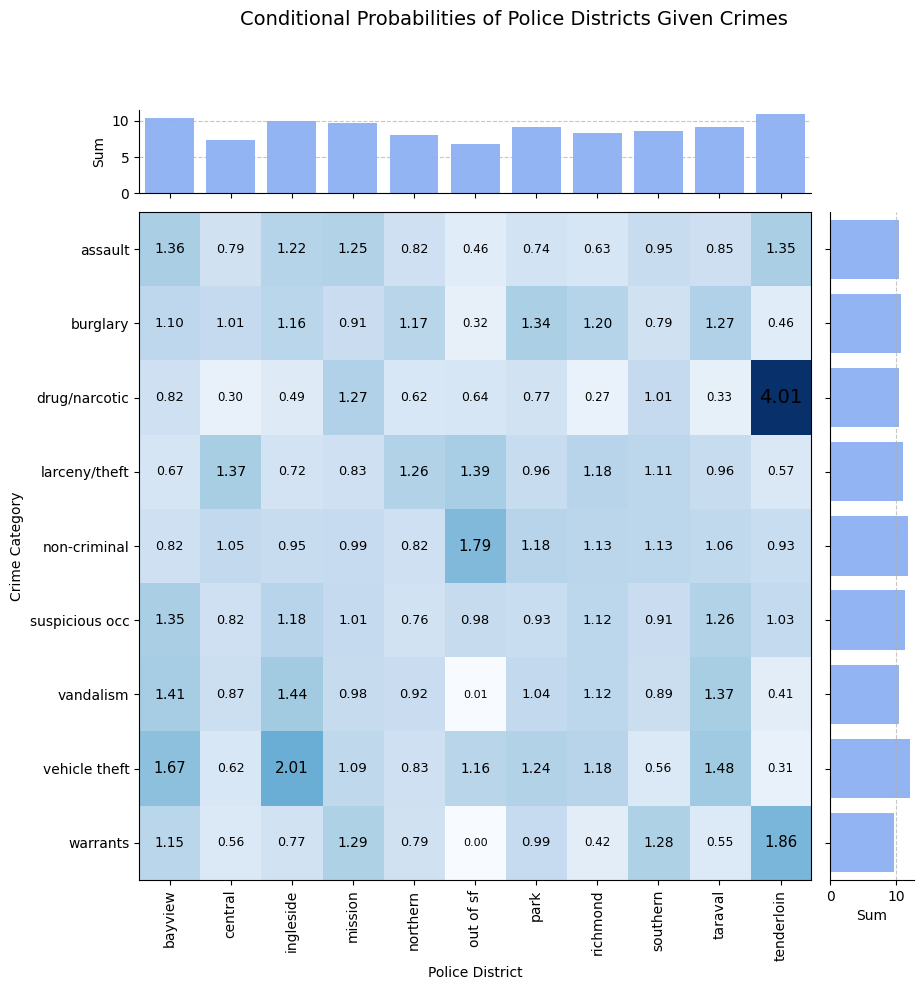

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

cond_probs = pd.DataFrame(cond_probs)

# Calculate sums for marginal bar charts
row_sums = cond_probs.sum(axis=1)
col_sums = cond_probs.sum(axis=0)

# Create figure with subplots using GridSpec
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(2, 2, width_ratios=[8, 1], height_ratios=[1, 8], 
              hspace=0.05, wspace=0.05)

# Main heatmap
ax_main = fig.add_subplot(gs[1, 0])
im = ax_main.imshow(cond_probs.T, cmap='Blues', aspect='auto')
ax_main.set_xticks(range(len(districts)))
ax_main.set_xticklabels(districts, rotation=90)
ax_main.set_yticks(range(len(crimes)))
ax_main.set_yticklabels(crimes)
ax_main.set_xlabel('Police District')
ax_main.set_ylabel('Crime Category')

# Text annotations
for i in range(cond_probs.shape[0]):
    for j in range(cond_probs.shape[1]):
        val = cond_probs.iloc[i, j]
        ax_main.text(i, j, f"{val:.2f}", ha='center', va='center', 
                    color='black', fontsize=8+(1.5*val))

# Column Sums
ax_top = fig.add_subplot(gs[0, 0], sharex=ax_main)
ax_top.bar(range(len(districts)), row_sums, color='cornflowerblue', alpha=0.7)
ax_top.set_ylabel('Sum')
ax_top.tick_params(labelbottom=False)
ax_top.spines['top'].set_visible(False)
ax_top.spines['right'].set_visible(False)
ax_top.grid(axis='y', linestyle='--', alpha=0.7)

# Row Sums
ax_right = fig.add_subplot(gs[1, 1], sharey=ax_main)
ax_right.barh(range(len(crimes)), col_sums, color='cornflowerblue', alpha=0.7)
ax_right.set_xlabel('Sum')
ax_right.tick_params(labelleft=False)
ax_right.spines['top'].set_visible(False)
ax_right.spines['right'].set_visible(False)
ax_right.grid(axis='x', linestyle='--', alpha=0.7)

fig.suptitle('Conditional Probabilities of Police Districts Given Crimes', fontsize=14, y=0.98)

plt.show()

In [5]:
from matplotlib import colormaps
list(colormaps())

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'berlin',
 'managua',
 'vanimo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',